In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Open the zip into the dataset folder if this does not work for you
df = pd.read_csv('./dataset/Impact_of_Remote_Work_on_Mental_Health.csv')
df

# df.describe()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


# Preprocessing Tasks
- Implicit Bias (Kevin)
- Null values (Johnny)
- Outliers (Obssa)
- normalization (Kevin)
- multicollinearity (Mohand)
- feature selection (Mohamed)

# Visualization Tasks
- heatmap (Obssa)
- bar chart (Mohamed)
- histogram (Johnny)
- line graph (Mohand)
- scatter plot (Obssa)
- box plot (Kevin)
- Piechart (Kevin)
- bubble chart (Mohamed)
- Violin Plot (Johnny)
- Area Chart (Mohand)

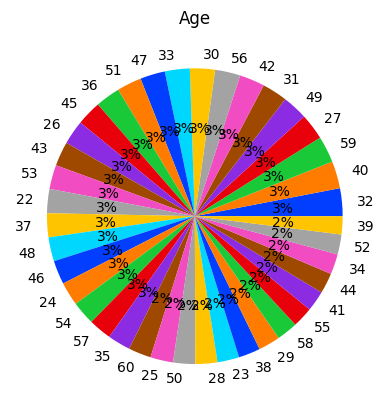

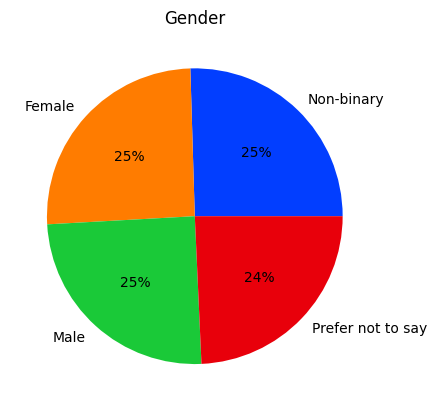

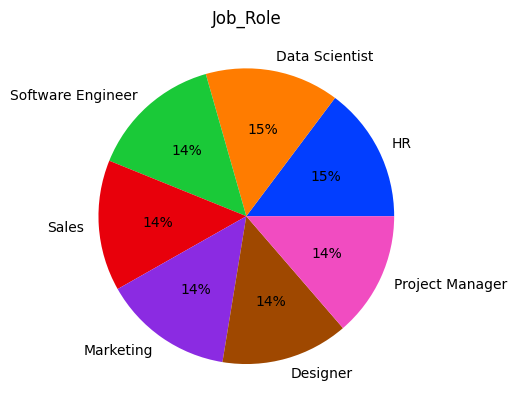

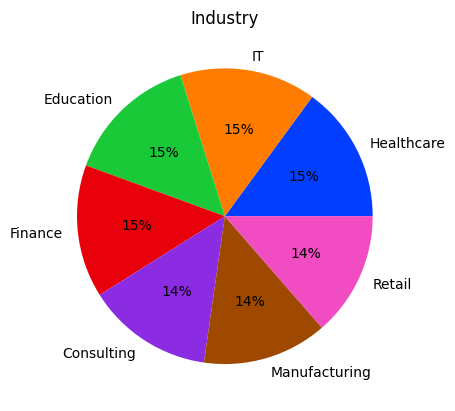

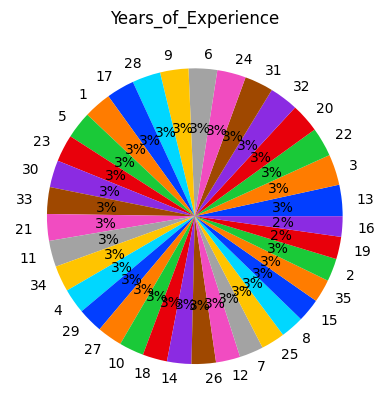

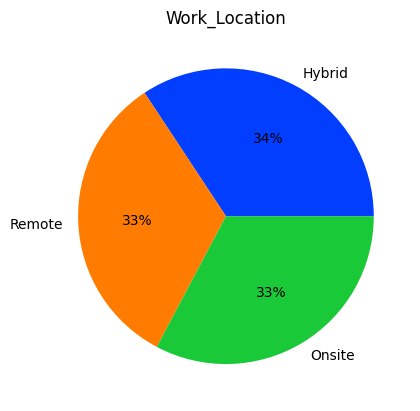

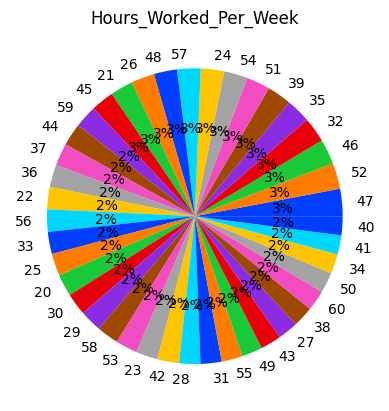

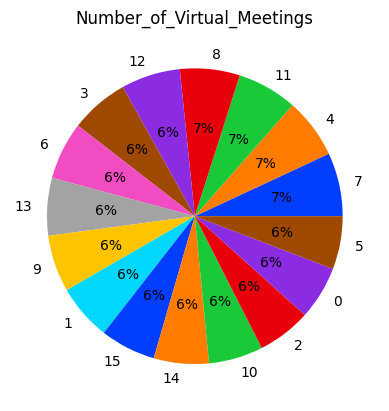

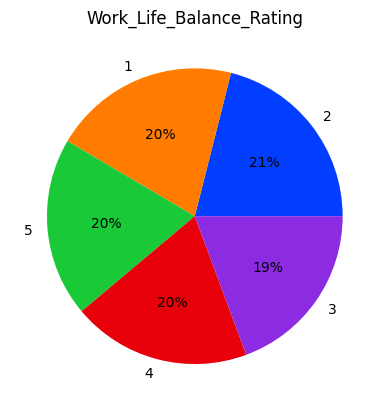

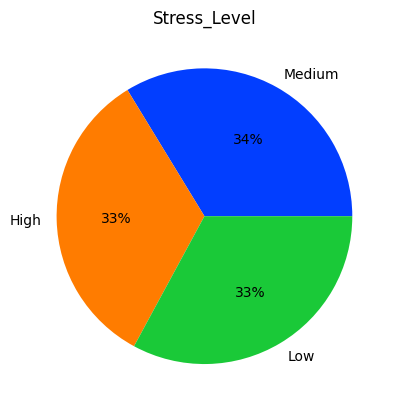

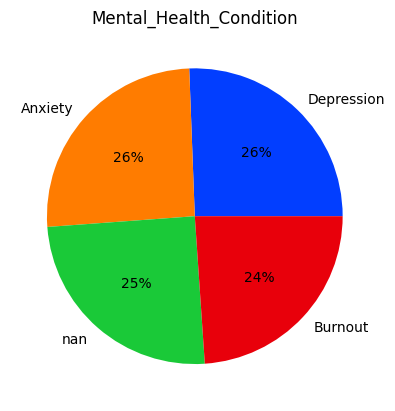

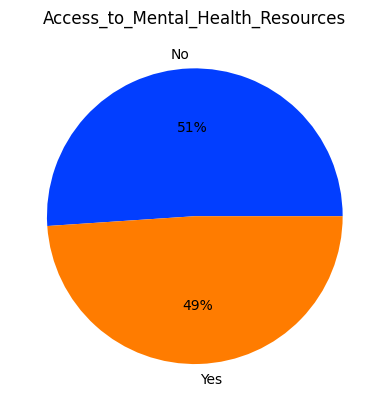

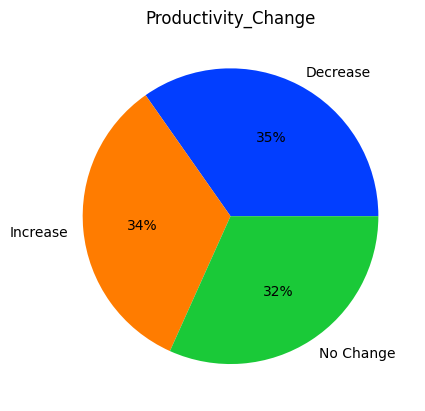

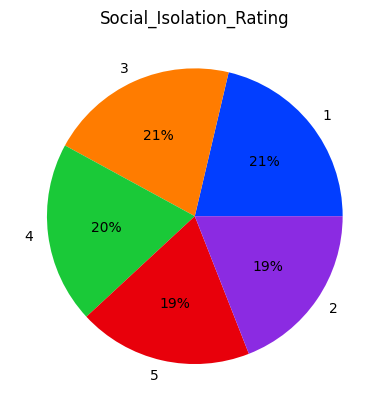

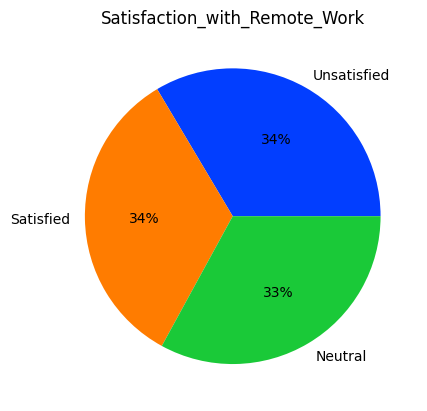

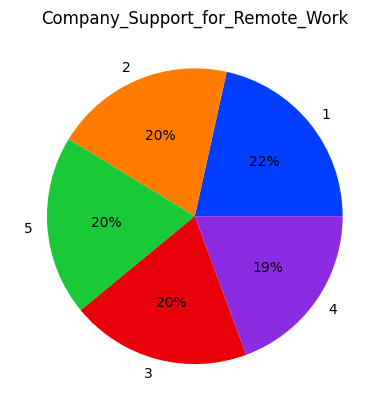

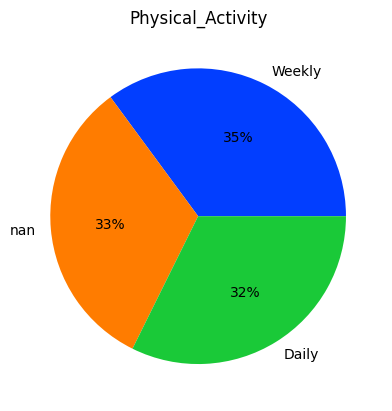

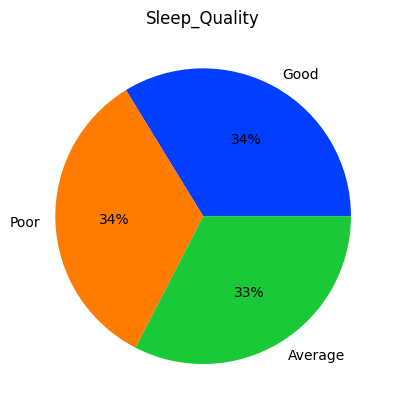

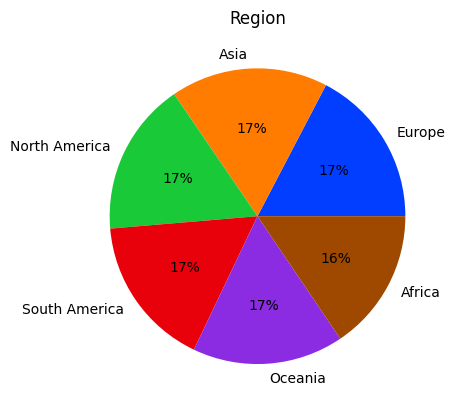

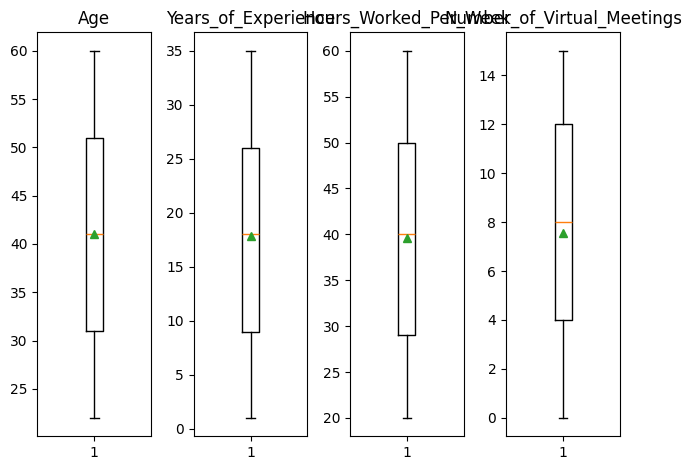

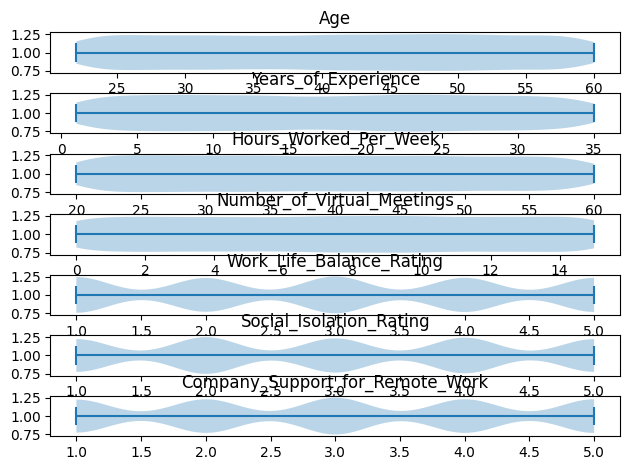

In [106]:
# Kevin's Corner
'''
Before preprocess
box plot
Piechart

Implicit Bias
normalization

After preprocess
box plot
Piechart
'''
def generate_pie_chart(features):
    for feature in features:
        keys = df[feature].unique()
        data = df[feature].value_counts(dropna=False)

        # define Seaborn color palette to use 
        palette_color = sns.color_palette('bright') 

        # plotting data on chart 
        plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 
        plt.title(feature)
    
        # displaying chart 
        plt.show() 

def generate_boxplot():
    features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
    fig, axs = plt.subplots(1, len(features))
    for i, ax in enumerate(axs.flat):
        ax.boxplot(df[features[i]], showmeans=True)
        ax.set_title(features[i])
        # plt.boxplot(x=df[features[i]], label=features[i], showmeans=True)

    plt.tight_layout()

def generate_violinplot():
    features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', ]
    fig, axs = plt.subplots(len(features))
    for i, ax in enumerate(axs):
        ax.violinplot(df[features[i]], vert=False)
        ax.set_title(features[i])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()

'''
Age	Gender	Job_Role	Industry	Years_of_Experience	Work_Location	
Hours_Worked_Per_Week	Number_of_Virtual_Meetings	Work_Life_Balance_Rating	
Stress_Level	Mental_Health_Condition	Access_to_Mental_Health_Resources	
Productivity_Change	Social_Isolation_Rating	Satisfaction_with_Remote_Work	
Company_Support_for_Remote_Work	Physical_Activity	Sleep_Quality	Region
'''

'''
Each feature is well balanced between all of the values that appears in them
No need to conduct SMOTE balancing
Uncomment the line below to generate pie charts for all features

The boxplot shows that there are no outliers in any of the columns

The violin plot shows that the distribution of data in the columns is balanced

More complicated visualizations should be 
'''
generate_pie_chart([key for key in df.keys() if key != 'Employee_ID' ])
generate_boxplot()
generate_violinplot()